<a href="https://colab.research.google.com/github/sarnavadatta/Stock-Data-Analysis/blob/main/Get_indian_stock_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
start=dt.date(2005,1,1)
end=dt.date(2021,5,25)

Tech_Stock = ['TCS.BO','WIPRO.BO','INFY.BO','HCLTECH.BO','TECHM.BO','LTIS.NS','MINDTREE.NS','TATAELXSI.NS']
Pharma_Stock = ['SUNPHARMA.NS','CIPLA.NS','LUPIN.NS','DRREDDY.NS','DIVISLAB.NS','CADILAHC.NS','AUROPHARMA.NS','GLENMARK.NS','BIOCON.NS',
                'ALKEM.NS','NATCOPHARM.NS','AJANTPHARM.NS','IPCALAB.NS','TORNTPHARM.NS','APLLTD.NS']
BANK_Stock=['HDFCBANK.BO','ICICIBANK.BO','AXISBANK.BO','YESBANK.BO','SBIN.BO','KOTAKBANK.NS','BANDHANBNK.NS','AUBANK.NS','IDFCFIRSTB.NS']                
Steel_Stock=['TATASTEEL.NS','JINDALSTEL.NS','JSWSTEEL.NS','HINDALCO.NS','SAIL.BO','KSL.BO']
Metal_Stock=['VEDL.BO','HINDZINC.NS','BPCL.NS','ONGC.NS','IOC.NS','GAIL.NS']
Cement_stock=['ULTRACEMCO.NS','AMBUJACEM.NS','ACC.NS','SHREECEM.NS','RAMCOCEM.NS']
FMCG_Stock=['ITC.BO','NESTLEIND.NS','BRITANNIA.NS','HINDUNILVR.NS','DABUR.NS','COLPAL.NS','GODREJCP.NS','MARICO.NS','EMAMILTD.NS','GILLETTE.NS','PGHH.NS']

# Top_BSE_Stock=['RELIANCE.BO','HDFCBANK.BO','IOC.BO','INFY.BO','ITC.BO','TCS.BO','TATASTEEL.NS','ONGC.BO']

In [ ]:
df = reader.get_data_yahoo(FMCG_Stock,start,end)['Close']
df

Symbols,ITC.BO,NESTLEIND.NS,BRITANNIA.NS,HINDUNILVR.NS,DABUR.NS,COLPAL.NS,GODREJCP.NS,MARICO.NS,EMAMILTD.NS,GILLETTE.NS,PGHH.NS
Date,,,,,,,,,,,
2005-01-03,29.178888,527.049988,93.114998,144.500000,15.290000,89.599998,25.863333,8.605093,NaN,689.849976,592.400024
2005-01-04,29.208887,527.049988,93.065002,146.300003,14.685000,88.349998,24.686666,8.671972,NaN,699.099976,573.349976
2005-01-05,28.755554,527.049988,90.510002,144.550003,15.050000,86.449997,24.276667,8.634817,NaN,693.150024,572.849976
2005-01-06,28.368889,527.049988,90.114998,141.850006,15.040000,85.650002,24.216665,8.699219,NaN,671.000000,561.700012
2005-01-07,28.851110,527.049988,90.125000,141.050003,14.960000,88.074997,23.680000,8.587754,NaN,676.500000,569.150024
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-20,207.000000,17285.349609,3422.550049,2344.149902,535.799988,1621.199951,815.500000,469.049988,499.950012,5523.350098,13297.000000
2021-05-21,209.050003,17497.099609,3435.750000,2362.250000,536.750000,1633.050049,818.450012,459.700012,503.899994,5480.100098,13303.500000
2021-05-24,211.500000,17360.300781,3379.100098,2336.550049,533.250000,1632.699951,808.299988,460.100006,511.549988,5491.899902,13157.099609


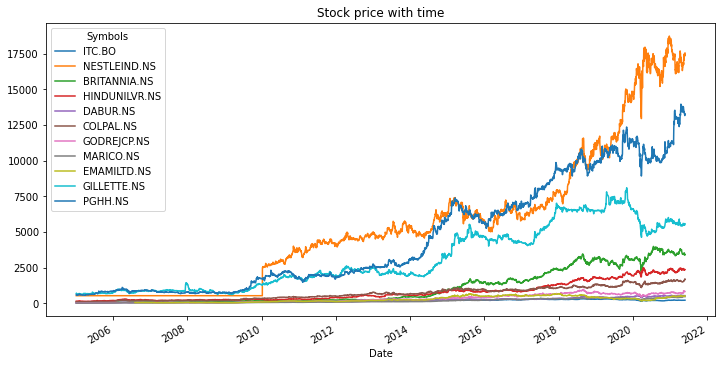

In [ ]:
df.plot(figsize=(12,6))
plt.title('Stock price with time')
plt.show()

In [ ]:
# calculate CAGR
def cagr(start_value, end_value, num_periods):
    return (end_value / start_value) ** (1 / (num_periods - 1)) - 1

# df.loc['2011-05-26':'2021-05-26']
start=df.loc['2011-05-26']
end=df.loc['2021-05-26']
year=10
cagr(start,end,year)

Symbols
ITC.BO           0.059991
NESTLEIND.NS     0.180726
BRITANNIA.NS     0.373880
HINDUNILVR.NS    0.253273
DABUR.NS         0.192053
COLPAL.NS        0.157806
GODREJCP.NS      0.229393
MARICO.NS        0.232477
EMAMILTD.NS      0.151200
GILLETTE.NS      0.130410
PGHH.NS          0.238475
dtype: float64

In [ ]:
daily_returns = df.pct_change().dropna(axis=0)
daily_returns

Symbols,ITC.BO,NESTLEIND.NS,BRITANNIA.NS,HINDUNILVR.NS,DABUR.NS,COLPAL.NS,GODREJCP.NS,MARICO.NS,EMAMILTD.NS,GILLETTE.NS,PGHH.NS
Date,,,,,,,,,,,
2006-08-04,-0.019825,0.000000,-0.000365,-0.018692,0.021024,-0.009830,-0.007486,0.002941,-0.040395,-0.012892,-0.020482
2006-08-07,0.002082,0.000000,0.006797,-0.004762,0.003764,-0.018876,0.009798,-0.007886,-0.010475,0.008865,0.002330
2006-08-08,0.023449,0.000000,0.034389,0.016405,0.007279,0.021662,0.004724,0.002751,-0.006861,0.017372,0.010983
2006-08-09,0.036833,0.000000,0.033289,0.004483,0.007008,-0.001116,0.022682,0.005589,0.020529,-0.015625,-0.007817
2006-08-10,-0.014266,0.000000,0.000678,-0.002678,-0.014135,0.018713,0.002982,-0.012329,-0.013540,-0.001205,-0.000116
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-20,-0.003610,-0.009399,-0.031646,-0.006611,-0.004182,0.009527,-0.007485,-0.009503,-0.016331,-0.002339,-0.008922
2021-05-21,0.009903,0.012250,0.003857,0.007721,0.001773,0.007309,0.003617,-0.019934,0.007901,-0.007830,0.000489
2021-05-24,0.011720,-0.007818,-0.016488,-0.010879,-0.006521,-0.000214,-0.012402,0.000870,0.015182,0.002153,-0.011005


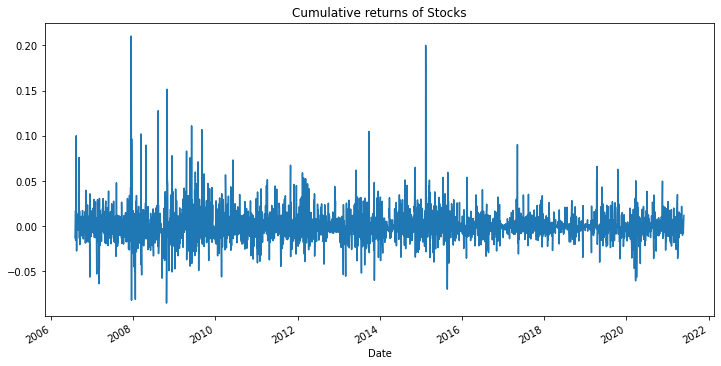

In [ ]:
# volatility
daily_returns['GILLETTE.NS'].plot(figsize=(12,6))
plt.title('volatility of Stocks')
plt.show()

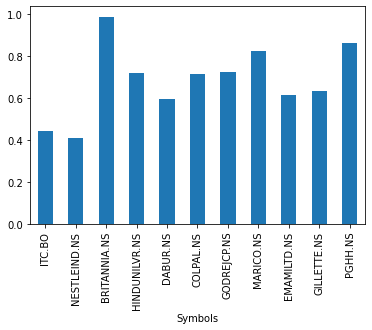

In [ ]:
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

N = 252 #252 trading days in a year
rf =0.005 #1% risk free rate
sharperatio = sharpe_ratio(daily_returns,N,rf)

sharperatio.plot.bar()

In [ ]:
# Calculate the cumulative return

daily_cumul_returns = (daily_returns + 1).cumprod() - 1
daily_cumul_returns 

Symbols,ITC.BO,NESTLEIND.NS,BRITANNIA.NS,HINDUNILVR.NS,DABUR.NS,COLPAL.NS,GODREJCP.NS,MARICO.NS,EMAMILTD.NS,GILLETTE.NS,PGHH.NS
Date,,,,,,,,,,,
2006-08-04,-0.019825,0.000000,-0.000365,-0.018692,0.021024,-0.009830,-0.007486,0.002941,-0.040395,-0.012892,-0.020482
2006-08-07,-0.017784,0.000000,0.006430,-0.023364,0.024867,-0.028520,0.002239,-0.004969,-0.050447,-0.004141,-0.018199
2006-08-08,0.005248,0.000000,0.041040,-0.007343,0.032327,-0.007476,0.006974,-0.002231,-0.056962,0.013159,-0.007417
2006-08-09,0.042274,0.000000,0.075695,-0.002893,0.039561,-0.008584,0.029814,0.003346,-0.037602,-0.002672,-0.015176
2006-08-10,0.027405,0.000000,0.076425,-0.005563,0.024867,0.009968,0.032885,-0.009025,-0.050633,-0.003874,-0.015290
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-20,2.620991,31.796414,30.213406,9.432354,11.112580,7.977987,14.652592,18.201200,10.167908,6.378732,14.172295
2021-05-21,2.656852,32.198179,30.333789,9.512906,11.134057,8.043611,14.709214,17.818446,10.256143,6.320954,14.179712
2021-05-24,2.699709,31.938623,29.817146,9.398532,11.054934,8.041672,14.514396,17.834821,10.427029,6.336718,14.012665


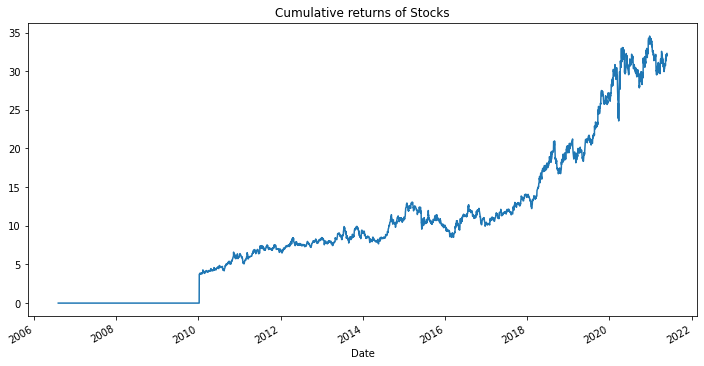

In [ ]:
daily_cumul_returns['NESTLEIND.NS'].plot(figsize=(12,6))
plt.title('Cumulative returns of Stocks')
plt.show()

In [ ]:
daily_cumul_returns[-1:]

Symbols,ITC.BO,NESTLEIND.NS,BRITANNIA.NS,HINDUNILVR.NS,DABUR.NS,COLPAL.NS,GODREJCP.NS,MARICO.NS,EMAMILTD.NS,GILLETTE.NS,PGHH.NS
Date,,,,,,,,,,,
2021-05-26,2.683091,32.282044,30.15367,9.476191,11.031197,8.298907,14.833014,17.795931,10.263961,6.447198,14.138635
